# **Visualizing Handwritten Digits Using t-SNE Dimensionality Reduction**

In [ ]:
# Import common data science libraries and plotting tools
import numpy as np  # numerical operations (arrays, math)
import pandas as pd  # DataFrame for tabular data
import matplotlib.pyplot as plt  # basic plotting functions
import seaborn as sns  # statistical visualizations built on matplotlib
import warnings  # control warnings display
warnings.filterwarnings('ignore')   # hide warnings to keep output clean

In [ ]:
from sklearn.datasets import load_digits  # loader for handwritten digits dataset

# Load the digits dataset (each sample is an 8x8 image flattened to 64 features)
digits = load_digits()  # returns a Bunch with .data and .target
X = digits.data  # feature matrix (n_samples, 64)
y = digits.target  # labels (0-9) for each sample

X.shape  # inspect shape: (n_samples, n_features)

(1797, 64)

In [ ]:
# Check the shape of the label array to confirm one label per sample
y.shape  # e.g., (1797,) meaning 1797 digit images

(1797,)

In [ ]:
# Load the digits dataset as a pandas DataFrame for easy inspection
df_digits = load_digits(as_frame=True).frame  # frame contains pixel columns and target
df_digits.head()  # preview the first rows

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


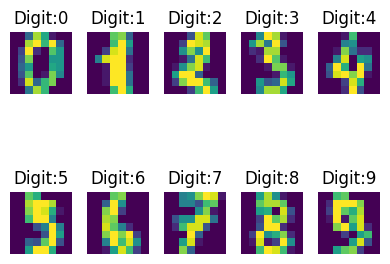

In [ ]:
# Visualize the first 10 digit images to get a feel for the data
plt.figure(figsize=(4,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i].reshape(8,8), cmap='gray')  # reshape flattened vector to 8x8 image
    plt.title(f"Digit:{y[i]}")  # show the true label above each image
    plt.axis('off')  # hide axis ticks for clarity
plt.tight_layout()
plt.show()

In [ ]:
# Standardize features before t-SNE (recommended for distance-based algorithms)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # transform to mean=0, std=1
X_scaled = scaler.fit_transform(X)  # fit scaler on X and transform it


- Scales the pixel features so each has zero mean and unit variance.
- Scaling helps algorithms like t-SNE behave more predictably.

In [ ]:
# Apply t-SNE for visualization in 2D
from sklearn.manifold import TSNE

# Initialize t-SNE with 2 components (2D) and a fixed random state for reproducibility
tsne = TSNE(n_components=2, random_state=35)
X_tsne = tsne.fit_transform(X_scaled)  # perform the dimensionality reduction

In [ ]:
# Inspect the shape of the t-SNE output
X_tsne.shape  # should be (n_samples, 2)

(1797, 2)

In [ ]:
# Create a DataFrame from the t-SNE output and attach labels for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['Component 1','Component 2'])
tsne_df['Digit'] = y  # add the true digit label as a column
tsne_df.head()  # preview the combined DataFrame

,Component 1,Component 2,Digit
0,-39.337513,-29.918493,0
1,-15.230238,-2.579565,1
2,5.744507,-14.477341,2
3,28.905914,2.239369,3
4,-36.547417,2.875664,4


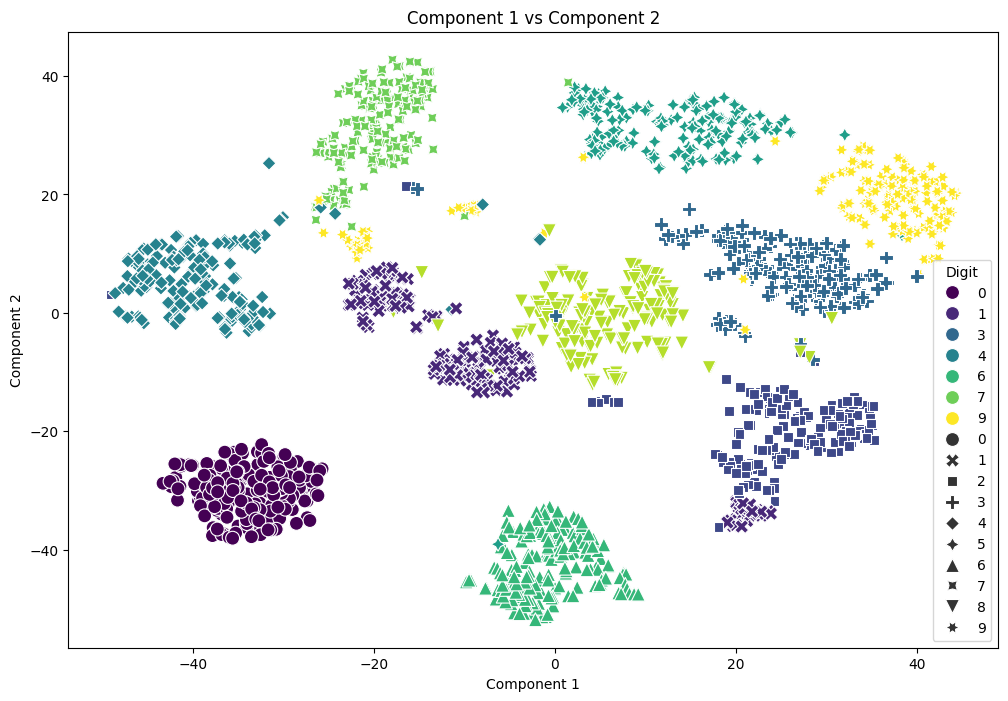

In [ ]:
# Plot the t-SNE embedding colored by digit class
plt.figure(figsize=(12,8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Digit', data=tsne_df,
               style='Digit', palette='viridis', s=100)
plt.title("Component 1 vs Component 2")
plt.show()

In [ ]:
# Final cell: placeholder for extra analysis or notes
pass  # no-op placeholder

### Conclusion

- t-SNE reduces the 64-dimensional digit data to 2D for visualization; clusters of the same digit indicate similar pixel patterns.
- Overlaps show digits with similar shapes (for example, 1 and 7) and are normal with t-SNE.
- t-SNE is mainly for visualization and is sensitive to hyperparameters — try different `perplexity` and `random_state` values for other views.
- Next steps: try PCA before t-SNE to speed up embedding, or use UMAP for faster, often better separations.